In [79]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [81]:
df=pd.read_csv("D:/50_Startups.csv")
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [83]:
x_features=df.iloc[:,:3]

In [85]:
x = sm.add_constant(x_features)
y=df['Profit']

In [87]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y = train_test_split(x,y,train_size = 0.8)

In [89]:
df = sm.OLS(train_y, train_x).fit()
df.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.941     
Dependent Variable:   Profit             AIC:                  850.1346  
Date:                 2024-12-05 16:18   BIC:                  856.8901  
No. Observations:     40                 Log-Likelihood:       -421.07   
Df Model:             3                  F-statistic:          208.3     
Df Residuals:         36                 Prob (F-statistic):   8.47e-23  
R-squared:            0.946              Scale:                9.0499e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           50268.0807 7006.3785  7.1746 0.0000 36058.4864 64477.6750
R&D Spend           0.8273    0.0508 16.2847 0.0000     0.7243     0.9303
Administration     -0.0420    0.0545 -0.7713 0.4456    -0.1525     0.0684
Marketing Spend     0.0218    0.0186  1.1738 0.2482    -0.0158     0.0594
-------------------------------------------------------------------------
Omnibus:                 11.757         Durbin-Watson:            1.738  
Prob(Omnibus):           0.003          Jarque-Bera (JB):         13.862 
Skew:                    -0.905         Prob(JB):                 0.001  
Kurtosis:                5.246          Condition No.:            1294283
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [91]:
pred_y=df.predict(test_x)
from sklearn.metrics import r2_score,mean_squared_error
print(np.abs(r2_score(test_y,pred_y)))
print(np.sqrt(mean_squared_error(test_y,pred_y)))

0.9613244721620445
8735.006772236435


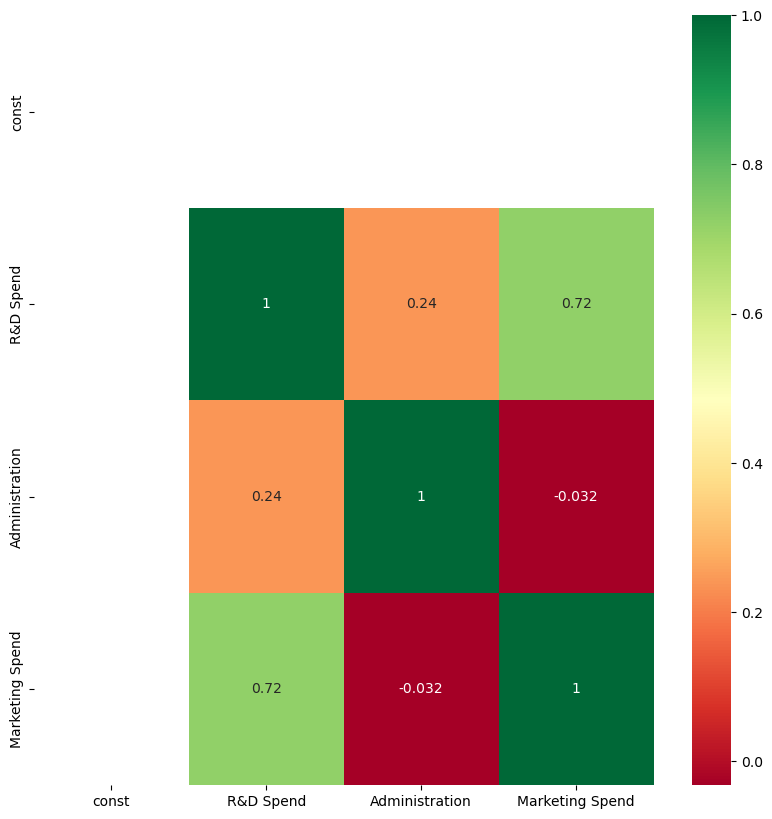

In [99]:
plt.figure(figsize =(10,10))
sb.heatmap(x.corr(),annot=True,cmap="RdYlGn")
plt.show()